<a href="https://colab.research.google.com/github/aryanntated/License_Plate_Detection_using_YOLOv8/blob/main/LicensePlate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Import Ultralytics and YOLO

In [6]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/112.6 GB disk)


#Import Annotated Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0RnxDSy0zqP9tVYR5ZIy")
project = rf.workspace("test-1tja4").project("my-first-project2-lxjmd")
version = project.version(1)
dataset = version.download("yolov8")


In [25]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.153 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/My-First-Project2-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

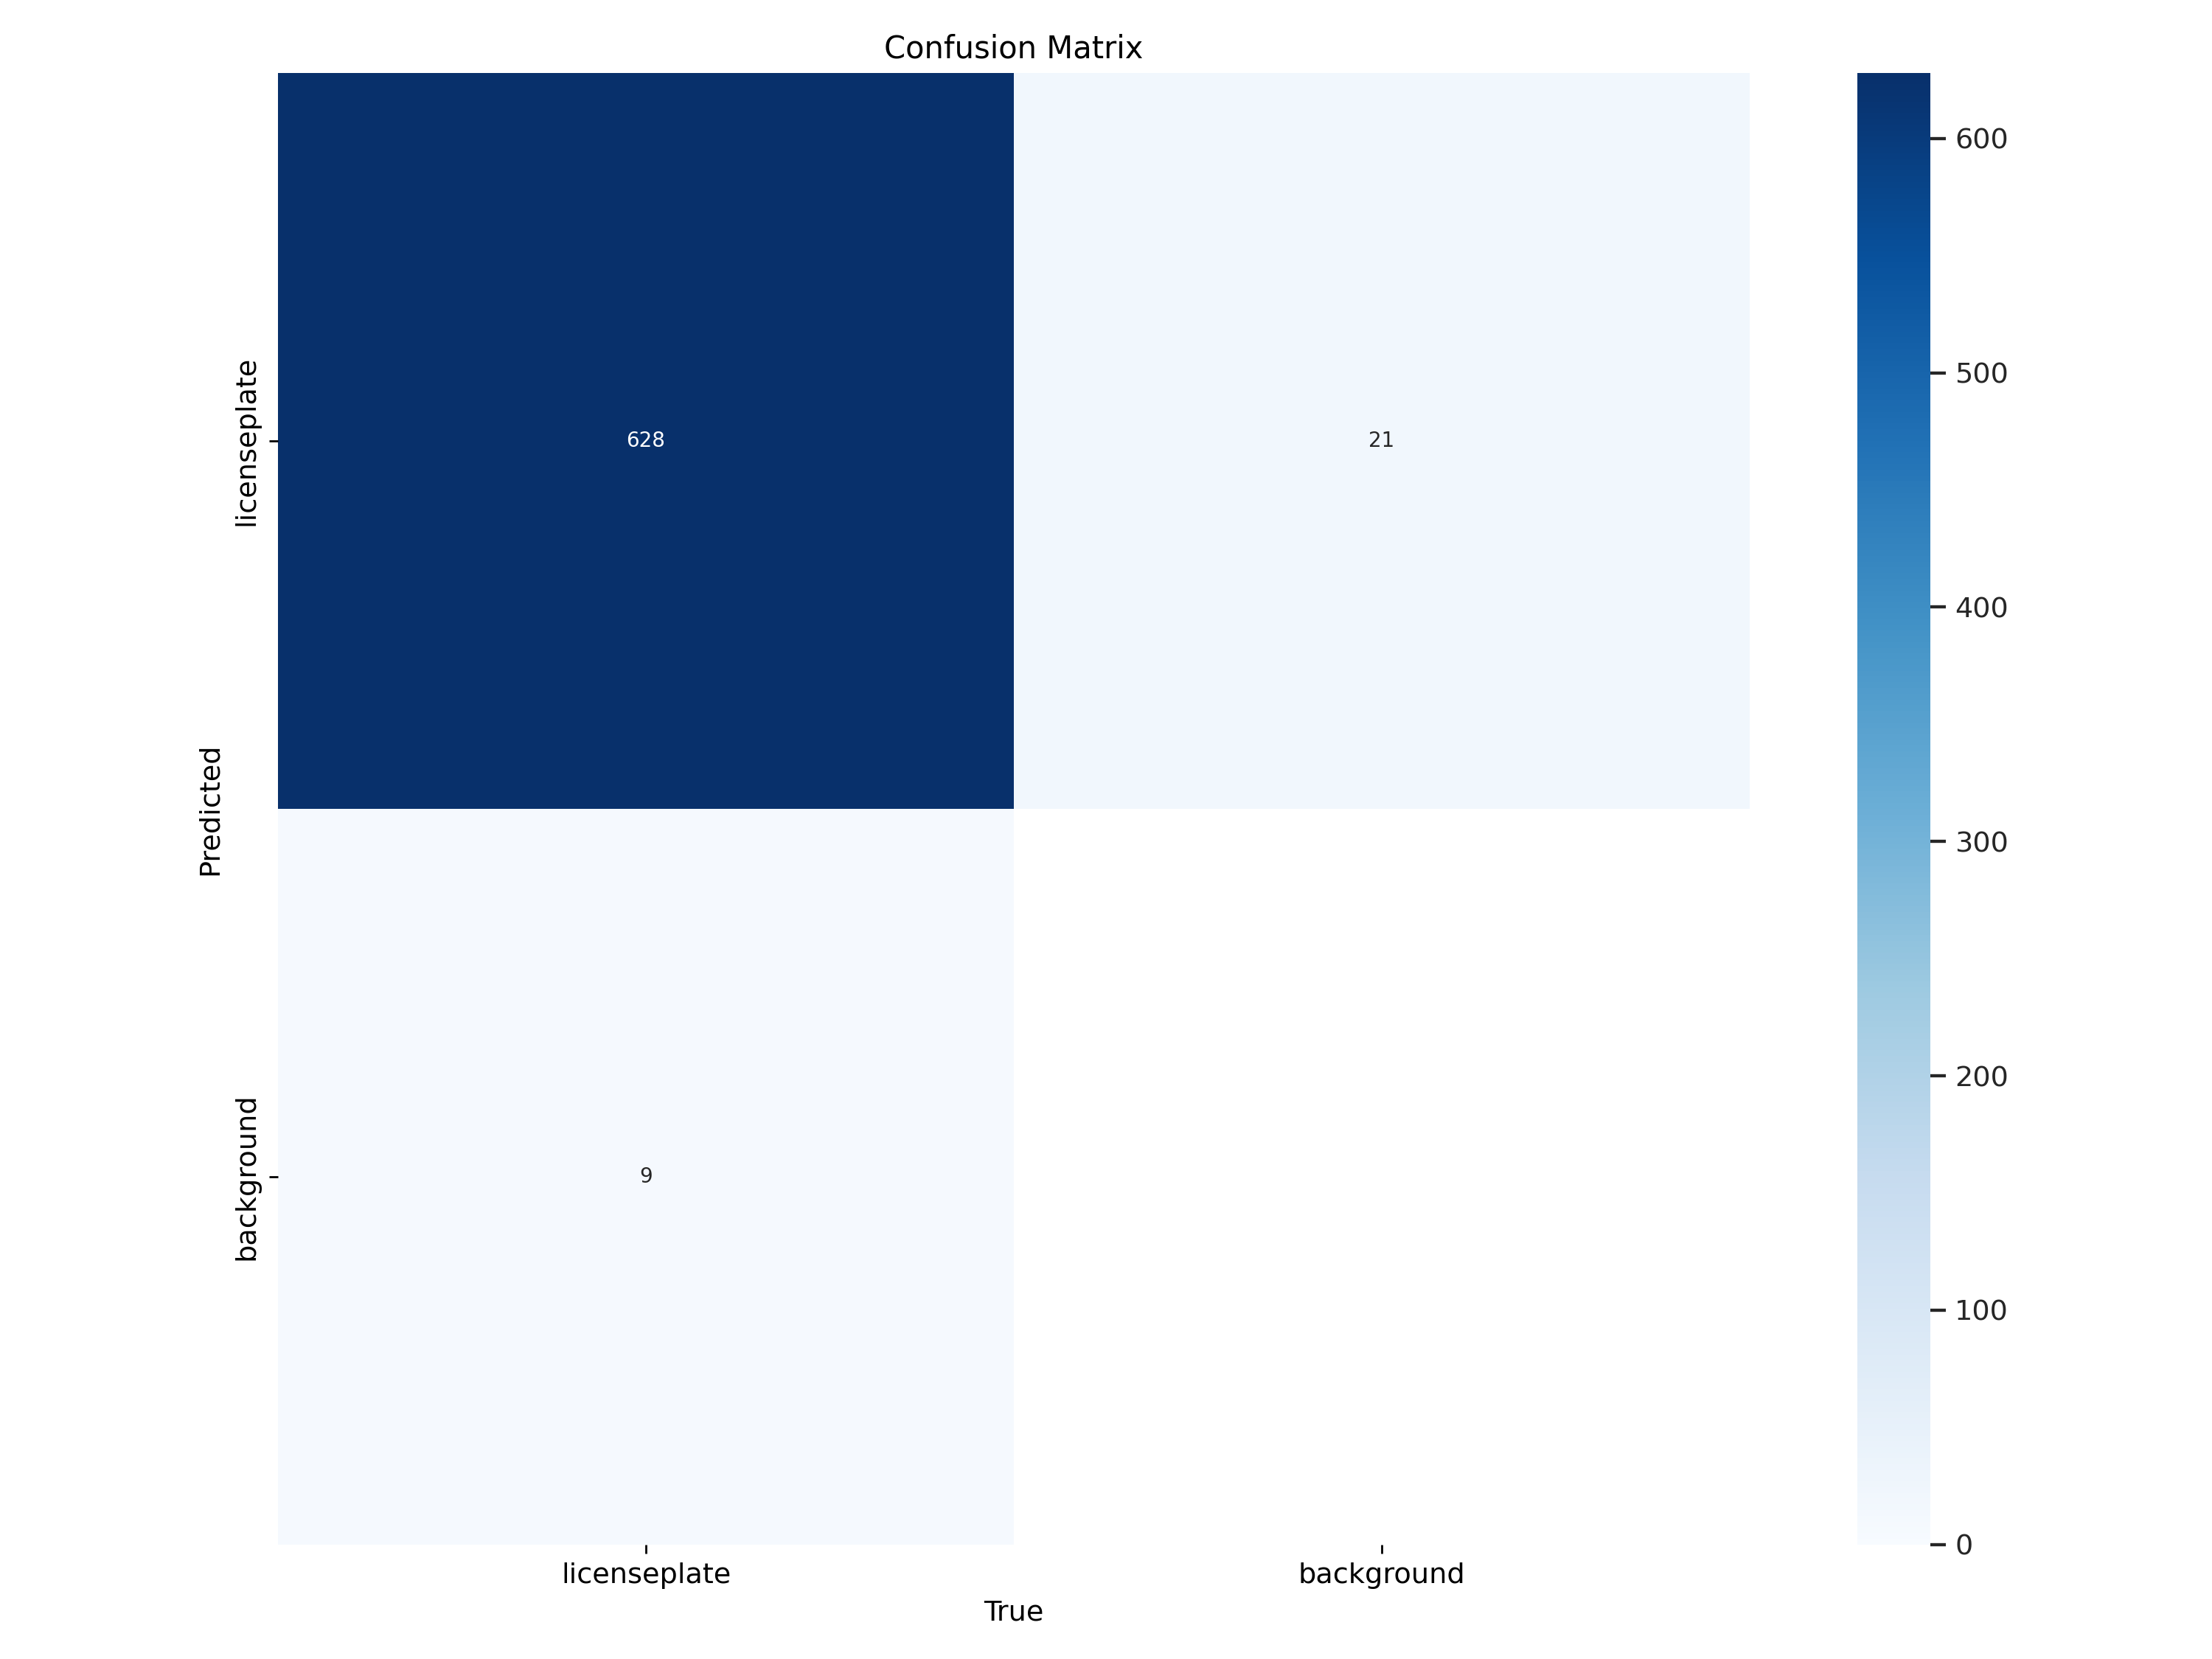

In [27]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/train2/confusion_matrix.png',width=1000))

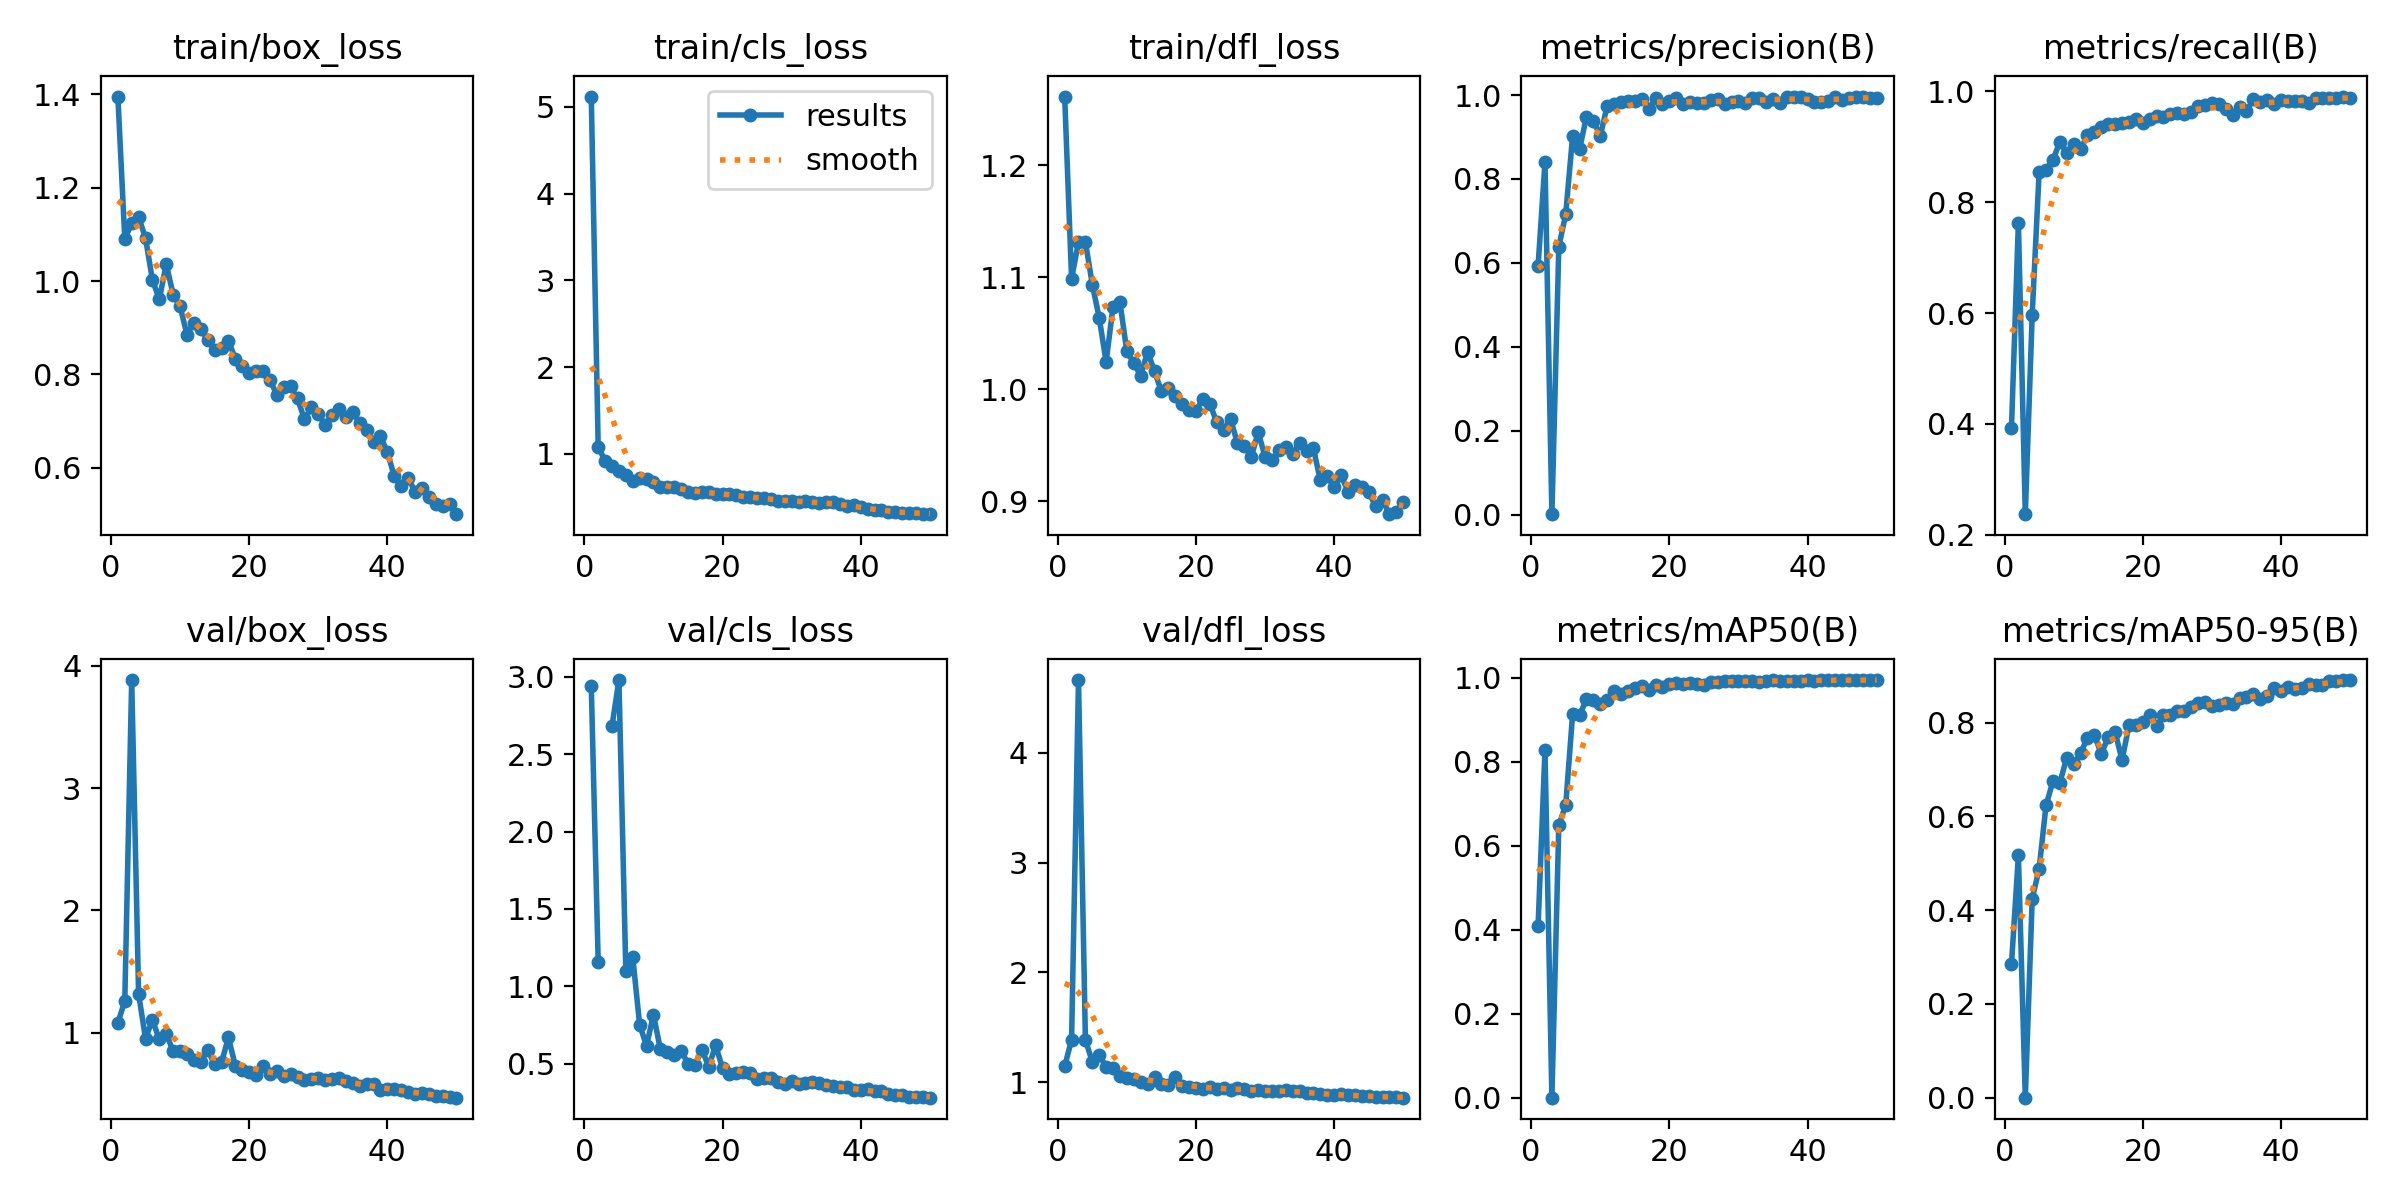

In [29]:
display(Image(filename='/content/runs/detect/train3/results.png',width=1000))

#Test Model

In [30]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/My-First-Project2-1/train/labels.cache... 601 images, 0 backgrounds, 0 corrupt: 100% 601/601 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:12<00:00,  3.13it/s]
                   all        601        637      0.993      0.991      0.994      0.894
Speed: 1.1ms preprocess, 12.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [31]:
import shutil

# Zip the folders into one file
shutil.make_archive("my_colab_folders", 'zip', root_dir=".", base_dir="My-First-Project2-1")
shutil.make_archive("runs_folder", 'zip', root_dir=".", base_dir="runs")

'/content/runs_folder.zip'

In [32]:
from google.colab import files

# Download the zipped folders
files.download("my_colab_folders.zip")
files.download("runs_folder.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>